In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
covid = pd.read_csv("owid-covid-data.csv")
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


<div style="background-color: lightblue; padding: 15px; border-radius: 5px;">


### 1) Si richiede di verificare le dimensioni del dataset e i relativi metadati

In [4]:
covid.shape

(429435, 67)

In [5]:
list(covid.columns)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

<div style="background-color: lightblue; padding: 15px; border-radius: 5px;">

### 2) Si chiede di trovare, per ogni continente: 
- ##### il numero di casi fin dall'inizio della pandemia
- ##### la percentuale rispetto al totale mondiale del numero di casi

In [7]:
# numero di casi fin dall'inizio della pandemia
flt_continent = covid.groupby("continent")["total_cases"].max()
flt_continent

continent
Africa             4072765.0
Asia              99373219.0
Europe            38997490.0
North America    103436829.0
Oceania           11861161.0
South America     37511921.0
Name: total_cases, dtype: float64

In [8]:
# percentuale rispetto al totale mondiale del numero di casi
total_cases = flt_continent.sum()
percentages_cases_continent = round((flt_continent/total_cases)*100,2)
percentages_cases_continent

continent
Africa            1.38
Asia             33.66
Europe           13.21
North America    35.03
Oceania           4.02
South America    12.70
Name: total_cases, dtype: float64

<div style="background-color: lightblue; padding: 15px; border-radius: 5px;">


### 3)Selezionare i dati relativi all'Italia nel 2022 e mostrare con dei grafici adeguati: 
-  ##### l'evoluzione del casi totali dall'inizio alla fine dell'anno
-  ##### il numero di nuovi casi rispetto alla data; poiché i nuovi casi vengono registrati settimanalmente, filtrare via i dati che non hanno misurazioni

In [10]:
# Controllo che tipo di dato è "date" 
type(covid["date"])


pandas.core.series.Series

In [11]:
# Conversione in datetime
covid["date"] = pd.to_datetime(covid["date"])

In [12]:
# Creo un filtro per i dati realtivi all'Italia nel 2022
flt_it_2022 = covid[(covid["location"]=="Italy")&(covid["date"].dt.year==2022)]

<Axes: xlabel='date'>

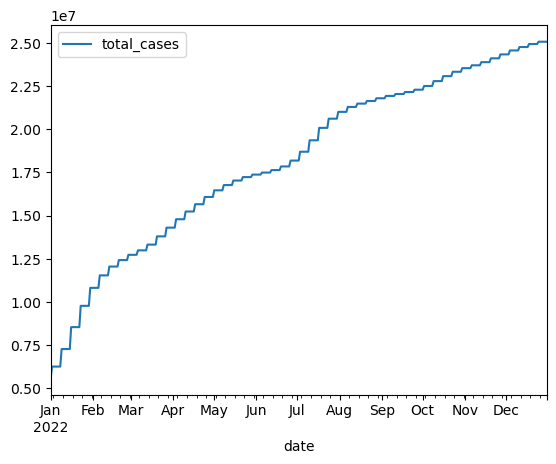

In [13]:
# Evoluzione del casi totali dall'inizio alla fine dell'anno
flt_it_2022.plot(x='date', y='total_cases')

<Axes: xlabel='date'>

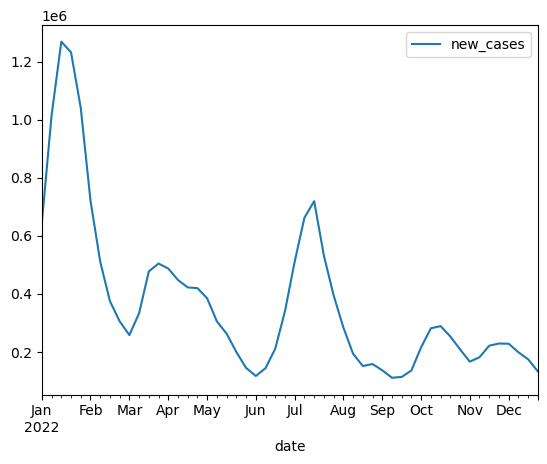

In [14]:
# Andamento nuovi casi filtrati
new_cases_italy = flt_it_2022[flt_it_2022["new_cases"] > 0] # per eliminare i valori in mezzo alla settimana poichè non hanno valore
new_cases_italy.plot(x='date', y='new_cases')

<div style="background-color: lightblue; padding: 15px; border-radius: 5px;">

### Riguardo le nazioni di Italia, Germania e Francia mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)
- ##### scrivere un breve commento a riguardo

<Axes: xlabel='location', ylabel='icu_patients'>

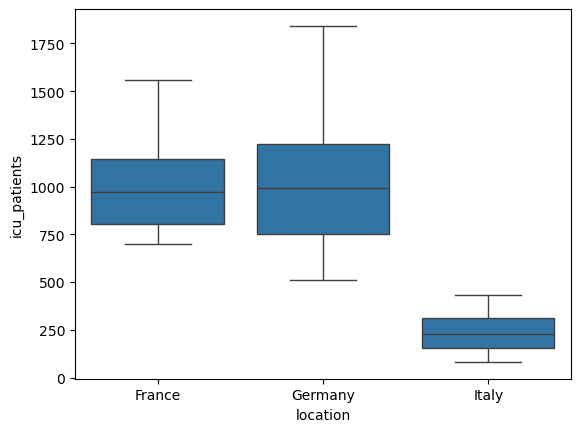

In [16]:
covid_countries = covid[covid["location"].isin(["Italy", "Germany", "France"])  & (covid["date"] >= "2022-05-01") & (covid["date"] <= "2023-04-30")] 
covid_countries_clean = covid_countries.dropna(subset="icu_patients")
sns.boxplot(x="location", y="icu_patients", data=covid_countries_clean)

<div style="background-color: lightblue; padding: 15px; border-radius: 5px;">


##### Il boxplot raffigura i casi di terapia intensiva in Francia, Germania e Italia da maggio 2022 ad aprile 2023. La Germania mostra la mediana più alta (poco più di 1000 casi), seguita dalla Francia (poco meno di 1000 casi) e dall'Italia (250 casi). La variabilità dei casi è maggiore in Germania e Francia rispetto all'Italia, come indicato dagli intervalli interquartili  e dai baffi. L'Italia ha un numero mediano di casi notevolmente inferiore e meno variabilità.

<div style="background-color: lightblue; padding: 15px; border-radius: 5px;">

### Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2023: 
- ##### mostrare la somma dei pazienti ospitalizzati per ognuna 
- ##### se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno

In [19]:
# Somma dei pazienti ospitalizzati per ogni nazione
countries = covid[(covid["location"].isin(["Italy", "Germany", "France","Spain"])) & (covid["date"] .dt.year == 2023)]
total_hosp_patients = countries.groupby("location")["hosp_patients"].sum()
total_hosp_patients

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

In [20]:
# totale valori nulli per pazienti ospitalizzati
total_hosp_patients = countries["hosp_patients"].isnull().sum()
total_hosp_patients

843

In [21]:
# Vado a stampare i valori nulli per effetturare un analisi
flt_nan =  countries.loc[countries["hosp_patients"].isnull(), ["location", "hosp_patients"]]
flt_nan
# noto che sono valori consecutivi

,location,hosp_patients
131549,France,NaN
131550,France,NaN
131551,France,NaN
131552,France,NaN
131553,France,NaN
...,...,...
364038,Spain,NaN
364039,Spain,NaN
364040,Spain,NaN
364041,Spain,NaN


In [22]:
# vado a controllare le nazioni che hanno dei valori nulli
flt_nan["location"].unique()


array(['France', 'Germany', 'Spain'], dtype=object)

<div style="background-color: lightblue; padding: 15px; border-radius: 5px;">

##### Dall'analisi effettuata possiamo notare che i valori nulli dei pazienti ospitalizzati è di 843 e che sono tutti consecutivi.
##### Possiamo dedurre che probabilmente il numero di pazienti ospitalizzati sia andato a diminuire e di conseguenza che possa essere
##### rientrata l'emergenza. In tal senso probabilmente non avrebbe senso andare a sostituire i valori nulli.



